<a href="https://colab.research.google.com/github/MarwaFA21/Marwa-Code/blob/main/Assessment_2_%5BMarwa_Fadlila_Amalia%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data diambil dari link berikut ini https://climate.nasa.gov/vital-signs/carbon-dioxide1

Dengan menggunakan data tersebut akan dilakukan pencarian statistik deskriptif, analisis data eksploratif dan pemodelan statistik menggunakan machine learning, baik supervised learning ataupun unsupervised learning.

#Import Library

In [ ]:
import numpy as np #operasi numerik
import pandas as pd #data frame
import matplotlib.pyplot as plt #memvisualisasi data, membuat grafik dasar
import seaborn as sns #memvisualisasi data, membuat grafik lengkap
import plotly.express as px
import scipy

#Import Data

In [ ]:
from google.colab import files
uploades = files.upload()

Saving Dataset.txt to Dataset.txt


In [ ]:
#mengimpor dataset CO2
df_CO2_asli = pd.read_csv('Dataset.txt', delim_whitespace = True, skiprows = 42, header = None)
df_CO2_asli.columns = ['year', 'month', 'decimal_date', 'monthly_avg', 'de-season_alized', '#days', 'st.dev_of_days', 'unc.of_mon_mean']
df_CO2_asli.head()

,year,month,decimal_date,monthly_avg,de-season_alized,#days,st.dev_of_days,unc.of_mon_mean
0,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
1,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
2,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
3,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
4,1958,8,1958.6219,314.93,316.18,-1,-9.99,-0.99


In [ ]:
#mengubah nama kolom
df_CO2 = df_CO2_asli.rename(columns = {"monthly_avg": "CO2 levels"})
df_CO2.head()

,year,month,decimal_date,CO2 levels,de-season_alized,#days,st.dev_of_days,unc.of_mon_mean
0,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
1,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
2,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
3,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
4,1958,8,1958.6219,314.93,316.18,-1,-9.99,-0.99


#Data Understanding

In [ ]:
#melihat informasi dataset CO2
df_CO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              785 non-null    int64  
 1   month             785 non-null    int64  
 2   decimal_date      785 non-null    float64
 3   CO2 levels        785 non-null    float64
 4   de-season_alized  785 non-null    float64
 5   #days             785 non-null    int64  
 6   st.dev_of_days    785 non-null    float64
 7   unc.of_mon_mean   785 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 49.2 KB


**Interpretasi**

---
Dari hasil output di atas, dapat dilihat bahwa tipe data dari setiap data adalah numerical yang berarti bahwa datanya berupa data kuantitatif yang nilainya berupa angka dengan tipe data yang digunakan, yaitu tipe data integer dan float. Tipe data integer adalah tipe data yang menyatakan bilangan bulat dan untuk tipe data float adalah tipe data yang menyatakan bilangan yang memiliki koma(desimal). Variabel yang bertipe data integer adalah variabel year, monthh, dan #day. Sedangkan, untuk variabel yang bertipe data float adalah variabel desimal_date, CO2 levels, de-season_alized, std_of_days, dan unc_of_mon_mean.

#Data Pre-Processing

In [ ]:
#melihat duplikasi data pada dataset CO2
df_CO2.duplicated().sum()

0

In [ ]:
#melihat missing values
df_CO2.isnull().sum()

year                0
month               0
decimal_date        0
CO2 levels          0
de-season_alized    0
#days               0
st.dev_of_days      0
unc.of_mon_mean     0
dtype: int64

**Interpretasi**

---

Setelah dilakukan pengecekan, terlihat bahwa tidak adanya gejala duplikasi data pada dataset CO2 serta jumlah missing value pada setiap kolomnya adalah 0. Kemudian akan dilakukan tahap pre-processing lanjutan dengan dataset yang sama.

#**CHECKPOINT 1**

# **Part 1 : Descriptive Statistics - Masic Measures**
Compute the mean, median, and standard deviation for CO2 Levels.

#**Mean**

In [ ]:
#mencari nilai mean CO2 levels secara keseluruhan
mean_CO2 = df_CO2['CO2 levels'].mean()
mean_CO2

358.4455286624204

**Interpretasi**


---


Dari output di atas, dapat diketahui bahwa rata-rata (mean) dari variabel CO2 Levels adalah sebesar 358,4455286624204.

In [ ]:
#mencari nilai mean CO2 levels setiap bulannya
mean_CO2_month = df_CO2.groupby("month")['CO2 levels'].mean().to_frame().reset_index()
mean_CO2_month

,month,CO2 levels
0,1,358.591231
1,2,359.365692
2,3,360.207077
3,4,360.833333
4,5,361.413485
5,6,360.852576
6,7,359.318182
7,8,357.307273
8,9,354.798308
9,10,354.847385


In [ ]:
#mencari nilai mean CO2 levels terbesar
mean_CO2_month.nlargest(1, 'CO2 levels')

,month,CO2 levels
4,5,361.413485


In [ ]:
#mencari nilai mean CO2 levels terkecil
mean_CO2_month.nsmallest(1, 'CO2 levels')

,month,CO2 levels
8,9,354.798308


**Interpretasi**

---
Berdasarkan output di atas, dapat diketahui bahwa rata-rata CO2 levels setiap bulannya tertinggi terjadi pada bulan ke-5 atau bulan Mei dengan rata-rata sebesar 361.413485. Sedangkan, untuk rata-rata CO2 levels terendah terjadi pada bulan ke-9 atau bulan September dengan nilai rata-rata sebesar 354.798308.

In [ ]:
#mencari rata-rata CO2 level per tahun
mean_CO2_year = df_CO2.groupby("year")['CO2 levels'].mean().to_frame().reset_index()
mean_CO2_year.head()

,year,CO2 levels
0,1958,315.180000
1,1959,315.980833
2,1960,316.910000
3,1961,317.644167
4,1962,318.454167


**Interpretasi**

---


Dari hasil di atas, dapat diketahui bahwa rata-rata CO2 levels dari 5 tahun teratas antara lain:


*   Tahun 1958 sebesar 315,180000
*   Tahun 1959 sebesar 315,980833
*   Tahun 1960 sebesar 316,910000
*   Tahun 1961 sebesar 317,644167
*   Tahun 1962 sebesar 318,454167







#**Median**

In [ ]:
#mencari nilai median CO2 levels secara keseluruhan
median_CO2 = df_CO2['CO2 levels'].median()
median_CO2

354.42

**Interpretasi**


---


Dari output di atas, dapat diketahui bahwa nilai tengah (median) dari variabel CO2 levels adalah sebesar 354,42

In [ ]:
#mencari nilai median CO2 levels setiap bulannya
median_CO2_month = df_CO2.groupby("month")['CO2 levels'].median().to_frame().reset_index()
median_CO2_month

,month,CO2 levels
0,1,354.930
1,2,355.820
2,3,357.330
3,4,357.575
4,5,358.305
5,6,357.310
6,7,355.595
7,8,353.515
8,9,351.380
9,10,351.690


In [ ]:
#mencari nilai median CO2 levels terbesar
median_CO2_month.nlargest(1, 'CO2 levels')

,month,CO2 levels
4,5,358.305


In [ ]:
#mencari nilai median CO2 levels terkecil
median_CO2_month.nsmallest(1, 'CO2 levels')

,month,CO2 levels
8,9,351.38


**Interpretasi**

---
Berdasarkan output di atas, dapat diketahui bahwa nilai tengah (median) CO2 levels setiap bulannya tertinggi terjadi pada bulan ke-5 atau bulan Mei dengan median sebesar 358.305. Sedangkan, untuk median CO2 levels terendah terjadi pada bulan ke-9 atau bulan September dengan nilai rata-rata sebesar 351.38.

In [ ]:
#mencari median CO2 level per tahun
median_CO2_year = df_CO2.groupby("year")['CO2 levels'].median().to_frame().reset_index()
median_CO2_year.head()

,year,CO2 levels
0,1958,314.930
1,1959,316.030
2,1960,316.705
3,1961,317.355
4,1962,318.245


**Interpretasi**

---


Dari hasil di atas, dapat diketahui bahwa median CO2 levels dari 5 tahun teratas antara lain:


*   Tahun 1958 sebesar 314,930
*   Tahun 1959 sebesar 316,030
*   Tahun 1960 sebesar 316,705
*   Tahun 1961 sebesar 317,355
*   Tahun 1962 sebesar 318,245

#**Standar Deviasi**

In [ ]:
#mencari nilai standar deviasi CO2 levels secara keseluruhan
std_CO2 = df_CO2['CO2 levels'].std()
std_CO2

31.10402666869917

**Interpretasi**


---


Dari output di atas, dapat diketahui bahwa nilai simpangan baku (standar deviasi) dari variabel CO2 levels yaitu sebesar 31.10402666869917

In [ ]:
#mencari nilai standar deviasi CO2 levels setiap bulannya
std_CO2_month = df_CO2.groupby("month")['CO2 levels'].std().to_frame().reset_index()
std_CO2_month

,month,CO2 levels
0,1,31.232796
1,2,31.274629
2,3,31.232825
3,4,31.589839
4,5,31.637430
5,6,31.588995
6,7,31.387039
7,8,31.333651
8,9,30.678749
9,10,30.840243


In [ ]:
#mencari nilai standar deviasi CO2 terbesar
std_CO2_month.nlargest(1, 'CO2 levels')

,month,CO2 levels
4,5,31.63743


In [ ]:
#mencari nilai standar deviasi CO2 terkecil
std_CO2_month.nsmallest(1, 'CO2 levels')

,month,CO2 levels
8,9,30.678749


**Interpretasi**

---
Berdasarkan output di atas, dapat diketahui bahwa nilai simpangan baku (standar deviasi) CO2 levels setiap bulannya tertinggi terjadi pada bulan ke-5 atau bulan Mei dengan nilai sebesar 31.63743. Sedangkan, untuk standar deviasi CO2 levels terendah terjadi pada bulan ke-9 atau bulan September dengan nilai rata-rata sebesar 30.678749.

In [ ]:
#mencari standar deviasi CO2 level per tahun
std_CO2_year = df_CO2.groupby("year")['CO2 levels'].std().to_frame().reset_index()
std_CO2_year.head()

,year,CO2 levels
0,1958,1.953068
1,1959,1.617194
2,1960,2.043869
3,1961,1.777365
4,1962,1.851783


**Interpretasi**

---


Dari hasil di atas, dapat diketahui bahwa standar deviasi CO2 levels dari 5 tahun teratas antara lain:


*   Tahun 1958 sebesar 1,953068
*   Tahun 1959 sebesar 1,617194
*   Tahun 1960 sebesar 2,043869
*   Tahun 1961 sebesar 1,777365
*   Tahun 1962 sebesar 1,851783

#**CHECKPOINT 2**

# **PART 2 : Exploratory Data Analysis with Python I - Univariate Analysis**
Visualize the distribution of CO2 Levels through plots like histograms or density plots.

#**Histogram Plots**

In [ ]:
#membuat histogram CO2 levels secara keseluruhan
px.histogram(df_CO2, x = 'CO2 levels')

**Interpretasi**

---
Berdasarkan grafik histogram plot di atas, dapat dilihat bahwa sebaran data condong ke sebelah kanan (positive skewness). Oleh karena itu, dapat disimpulkan bahwa data variabel CO2 levels memiliki nilai mean lebih besar daripada nilai modus.

In [ ]:
#membuat histogram CO2 levels berdasarkan tahun
px.histogram(df_CO2, x = 'year', y = 'CO2 levels')

**Interpretasi**

---
Berdasarkan grafik histogram plot di atas, dapat dilihat bahwa sebaran data tidak memiliki pola. Oleh karena itu, dapat disimpulkan bahwa data variabel CO2 levels berdasarkan bulan berdistribusi acak. Hal ini biasanya terjadi karena kesalahan dalam pemilihan data yang akan digabungkan.

In [ ]:
#membuat histogram CO2 levels berdasarkan bulan
px.histogram(df_CO2, x = 'month', y = 'CO2 levels')

**Interpretasi**

---
Berdasarkan grafik histogram plot di atas, dapat dilihat bahwa sebaran data tidak memiliki pola. Oleh karena itu, dapat disimpulkan bahwa data variabel CO2 levels berdasarkan bulan berdistribusi acak. Hal ini biasanya terjadi karena kesalahan dalam pemilihan data yang akan digabungkan.

#**Density Plots**

<ipython-input-26-b968772f13f1>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Density Plot of CO2 Levels')

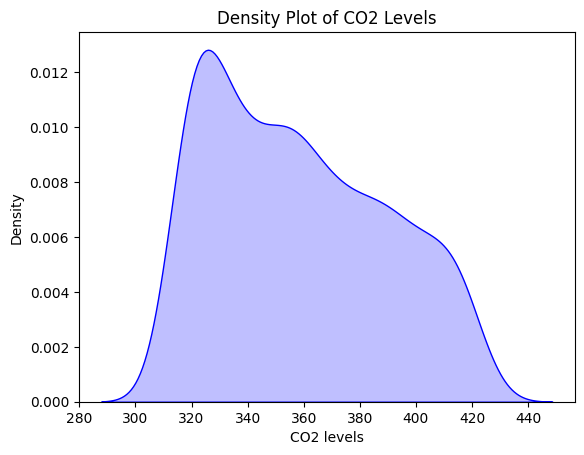

In [ ]:
#membuat plot densitas CO2 levels
sns.kdeplot(df_CO2['CO2 levels'], shade = True, color = 'blue')
plt.title("Density Plot of CO2 Levels")

<ipython-input-27-50eeb090a207>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




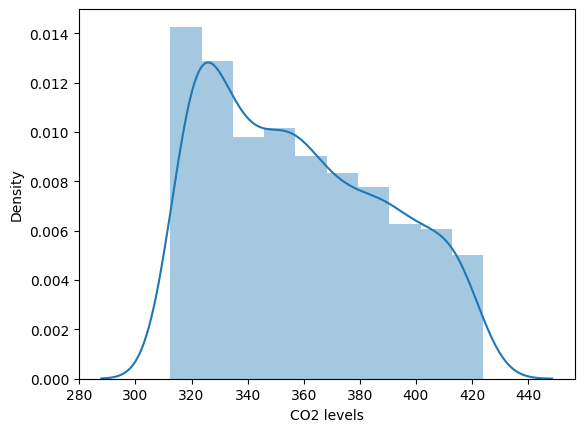

In [ ]:
#membuat distribusi plot CO2 levels secara keseluruhan
Displot = sns.distplot(df_CO2['CO2 levels'])

<ipython-input-28-3990be7f19fa>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='CO2 levels', ylabel='Density'>

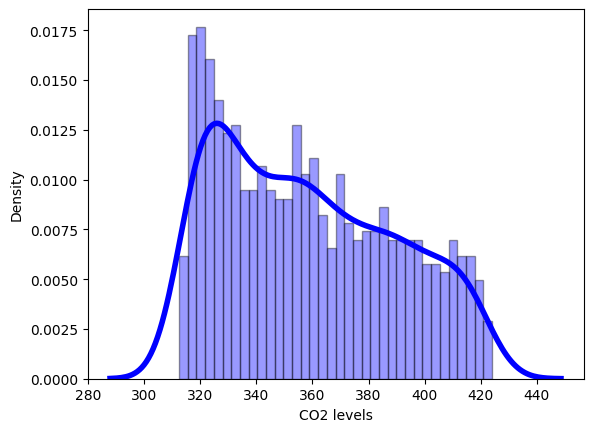

In [ ]:
#membuat distribusi plot CO2 levels secara keseluruhan
sns.distplot(df_CO2['CO2 levels'], hist=True, kde=True,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth':4})

In [ ]:
#mencari nilai skewness (kecondongan)
print(scipy.stats.skew(df_CO2['CO2 levels'], axis=0, bias=True))

0.3627049370307137


**Interpretasi**

---
Berdasarkan 3 model grafik distribusi plot di atas, dapat dilihat bahwa sebaran data condong ke sebelah kanan atau ke nilai yang lebih rendah (positive skewness). Hal ini dapat dibuktikan dari hasil nilai skewness yang lebih besar dari 0 yang berarti bentuk distribusinya positive (positive skewness). Oleh karena itu, dapat disimpulkan bahwa data variabel CO2 levels memiliki nilai mean lebih besar daripada nilai modus dan data tersebut normal karena masih dalam rentang nilai skewness -2 sampai dengan 2.

##**Part 3: Exploratory Data Analysis with Python II - Bivariate Analysis**
Investigate the relationship between Year and CO2 Levels using scatter plots, line plots, or correlation matrices.

#**Scatter Plots**

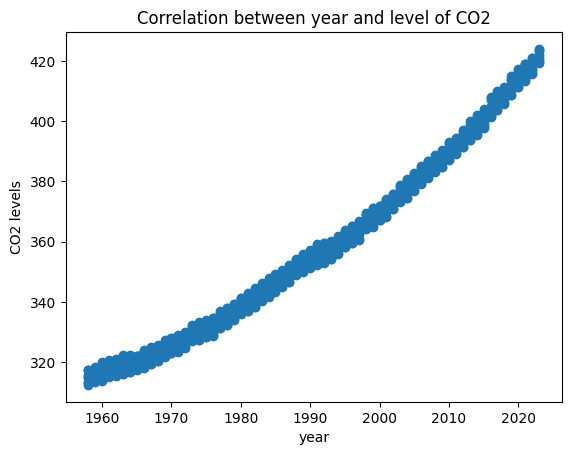

In [ ]:
#membuat scatter plot antara year dengan CO2
plt.scatter(df_CO2['year'], df_CO2['CO2 levels'])
plt.xlabel('year')
plt.ylabel('CO2 levels')
plt.title('Correlation between year and level of CO2')
plt.show()

**Interpretasi**


---
Berdasarkan output grafik di atas terlihat bahwa semakin besar tahun, maka akan semakin besar pula nilai CO2 levelsnya. Oleh karena itu, dapat disimpulkan bahwa keduanya memiliki hubungan positif (Positive Correlation).


In [ ]:
#membuat scatter plot antara year dengan CO2 levels berdasarkan nilai rata-rata bulanan
px.scatter(mean_CO2_month,x = 'month', y = 'CO2 levels', color='CO2 levels',title='Correlation between month and level of CO2')

**Interpretasi**


---
Dari grafik rata-rata perbulan CO2 levels di atas, dapat dilihat bahwa plotnya tidak membentuk hubungan, tetapi membentuk gelombang cosinus. Sehingga, dari grafik tersebut dapat disimpulkan bahwa rata-rata CO2 levels tertinggi terjadi pada bulan 5 atau bulan Mei dan rata-rata CO2 levels terendah terjadi pada bulan 9 atau bulan September.

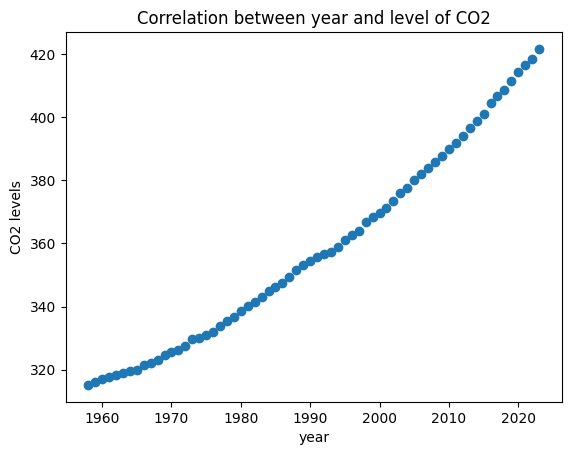

In [ ]:
#membuat scatter plot antara year dengan CO2 levels berdasarkan nilai rata-rata tahunan
plt.scatter(mean_CO2_year['year'], mean_CO2_year['CO2 levels'])
plt.xlabel('year')
plt.ylabel('CO2 levels')
plt.title('Correlation between year and level of CO2')
plt.show()

**Interpretasi**


---
Berdasarkan output grafik di atas terlihat bahwa semakin besar tahun, maka akan semakin besar pula nilai CO2 levelsnya. Oleh karena itu, dapat disimpulkan bahwa keduanya memiliki hubungan positif (Positive Correlation).

#**Line Plots**

In [ ]:
#membuat line plot antara year dengan CO2
px.line(df_CO2,x = 'year',y = 'CO2 levels',title='Line plot between year and level of CO2')

**Interpretasi**


---
Berdasarkan output grafik di atas terlihat bahwa semakin besar tahun, maka akan semakin besar pula nilai CO2 levelsnya. Oleh karena itu, dapat disimpulkan bahwa keduanya memiliki hubungan positif (Positive Correlation).

In [ ]:
#membuat line plot antara year dengan CO2 levels berdasarkan nilai rata-rata bulanan
px.line(mean_CO2_month,x = 'month',y = 'CO2 levels',title='Line plot between month and level of CO2')

**Interpretasi**


---
Dari grafik rata-rata perbulan CO2 levels di atas, dapat dilihat bahwa plotnya tidak membentuk hubungan, tetapi membentuk gelombang cosinus. Sehingga, dari grafik tersebut dapat disimpulkan bahwa rata-rata CO2 levels tertinggi terjadi pada bulan 5 atau bulan Mei dan rata-rata CO2 levels terendah terjadi pada bulan 9 atau bulan September.

In [ ]:
#membuat line plot antara year dengan CO2 levels berdasarkan nilai rata-rata tahunan
px.line(mean_CO2_year,x = 'year',y = 'CO2 levels',title='Line plot between year and level of CO2')

**Interpretasi**


---
Berdasarkan output grafik di atas terlihat bahwa semakin besar tahun, maka akan semakin besar pula nilai CO2 levelsnya. Oleh karena itu, dapat disimpulkan bahwa keduanya memiliki hubungan positif (Positive Correlation).

#**Correlation Matrices**

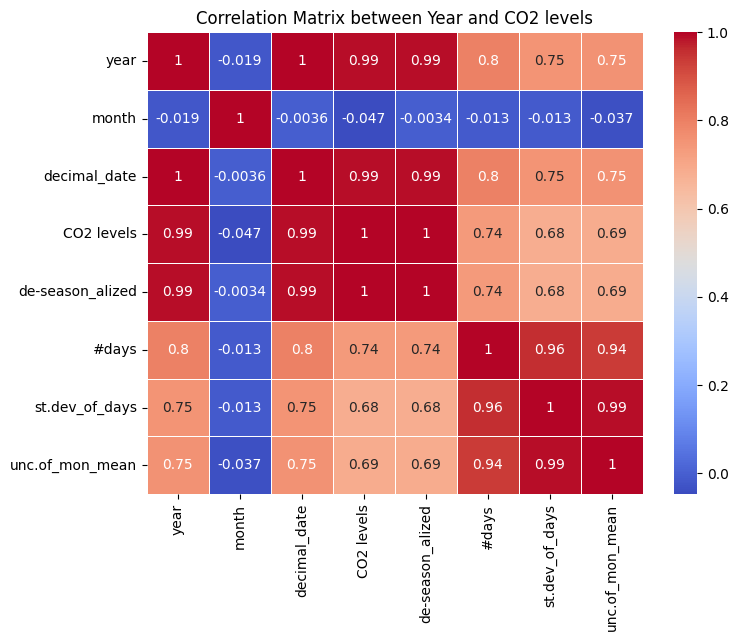

In [ ]:
#membuat matrix korelasi antara year dengan CO2
correlation_matrix = df_CO2.corr()
plt.figure(figsize=(8, 6))  # Ukuran heatmap (opsional)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix between Year and CO2 levels')
plt.show()

**Interpretasi**


---
Berdasarkan output matriks korelasi di atas, dapat diketahui bahwa antara variabel CO2 levels dengan variabel year memiliki hubungan yang kuat dan positif dengan nilai korelasinya sebesar 0.99. Antara variabel CO2 levels dengan variabel month memiliki hubungan yang lemah dan negatif dengan nilai korelasinya sebesar -0.047. Antara variabel de-season_alized dengan variabel year memiliki hubungan yang kuat dan positif dengan nilai korelasinya sebesar 0.99. Antara variabel de-season_alized dengan variabel month memiliki hubungan yang lemah dan negatif dengan nilai korelasinya sebesar -0.0034.

#**Part 4: Supervised Learning - Regression - Simple Linear Regression**
Perform a simple linear regression using Year as the independent variable and CO2 Levels as the dependent variable.

#Import Library

In [ ]:
#Regression Linear
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Evaluasi Model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
from sklearn.metrics import r2_score

# Data Pre-Processing

In [ ]:
#melakukan seleksi atribut
df_CO2['Regressor'] = df_CO2['year']
df_CO2['Response'] = df_CO2['CO2 levels']

**Interpretasi**

---
Dalam analisis regresi, diperlukan dua variabel utama untuk pemodelan, yaitu regressor atau independent dan response atau dependent. Pada tahap ini, dilakukan seleksi atribut dengan tujuan untuk menentukan atribut/variabel mana yang akan dijadikan sebagai regressor dan response. Berdasarkan ketentuan di atas bahwa atribut year dijadikan sebagai variabel independent, sedangkan CO2 levels dijadikan sebagai variabel dependent.

In [ ]:
#menghilangkan kolom yang tidak diperlukan
df_CO2.drop(['year','month', 'decimal_date', 'CO2 levels', 'de-season_alized','#days', 'st.dev_of_days', 'unc.of_mon_mean'],axis=1,inplace=True)

In [ ]:
#menguji data tahun 2022
test = df_CO2[df_CO2['Regressor']==2022]
df_CO2 = df_CO2[df_CO2['Regressor'] != 2022]

In [ ]:
#melihat bentuk data test
test.shape

(12, 2)

**Interpretasi**

---
Berdasarkan output di atas dapat diketahui bahwa data yang akan digunakan untuk pengujian adalah data tahun 2022, sedangkan tahun lainnya digunakan sebagai data training. Jumlah baris dan kolom pada data testing sebanyak 12 dan 3.

In [ ]:
#melihat final data training setelah pre-processing
df_CO2

,Regressor,Response
0,1958,317.45
1,1958,317.51
2,1958,317.24
3,1958,315.86
4,1958,314.93
...,...,...
780,2023,423.36
781,2023,424.00
782,2023,423.68
783,2023,421.83


In [ ]:
#melihat final data testing setelah pre-processing
test

,Regressor,Response
765,2022,418.13
766,2022,419.24
767,2022,418.76
768,2022,420.19
769,2022,420.97
770,2022,420.94
771,2022,418.85
772,2022,417.15
773,2022,415.91
774,2022,415.74


#Exploratory Data Analysis

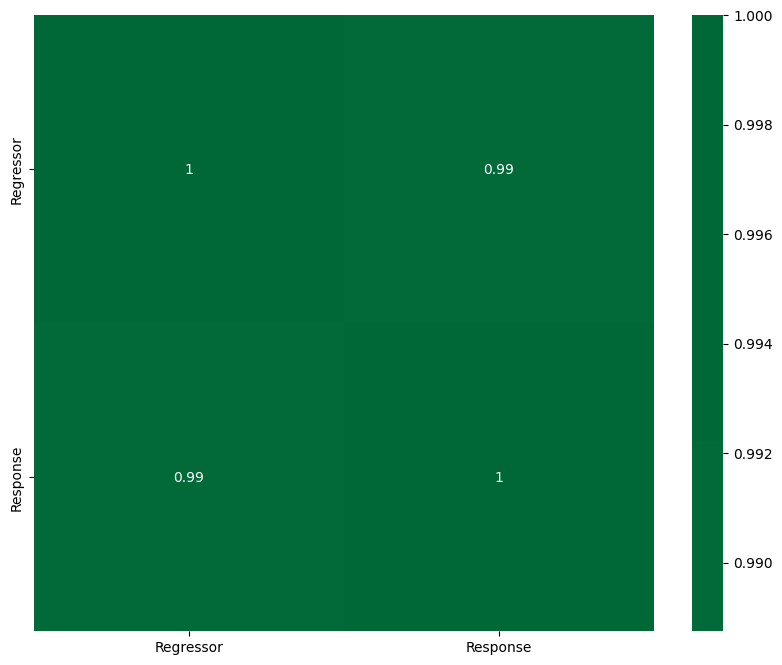

In [ ]:
#mengetahui korelasi antar atribut/variabel bebas melalui heatmap
plt.figure(figsize = (10,8))
p=sns.heatmap(df_CO2.corr(), annot=True, cmap='RdYlGn', center=0)

**Interpretasi**

---
Berdasarkan output matriks korelasi di atas, dapat diketahui bahwa antara variabel Regressor dengan variabel Response memiliki hubungan yang kuat dan positif dengan nilai korelasinya sebesar 0.99. Hal ini dapat diartikan bahwa semakin besar tahunnya maka nilai CO2 levelsnya juga akan semakin meningkat.

array([[<Axes: title={'center': 'Regressor'}>,
        <Axes: title={'center': 'Response'}>]], dtype=object)

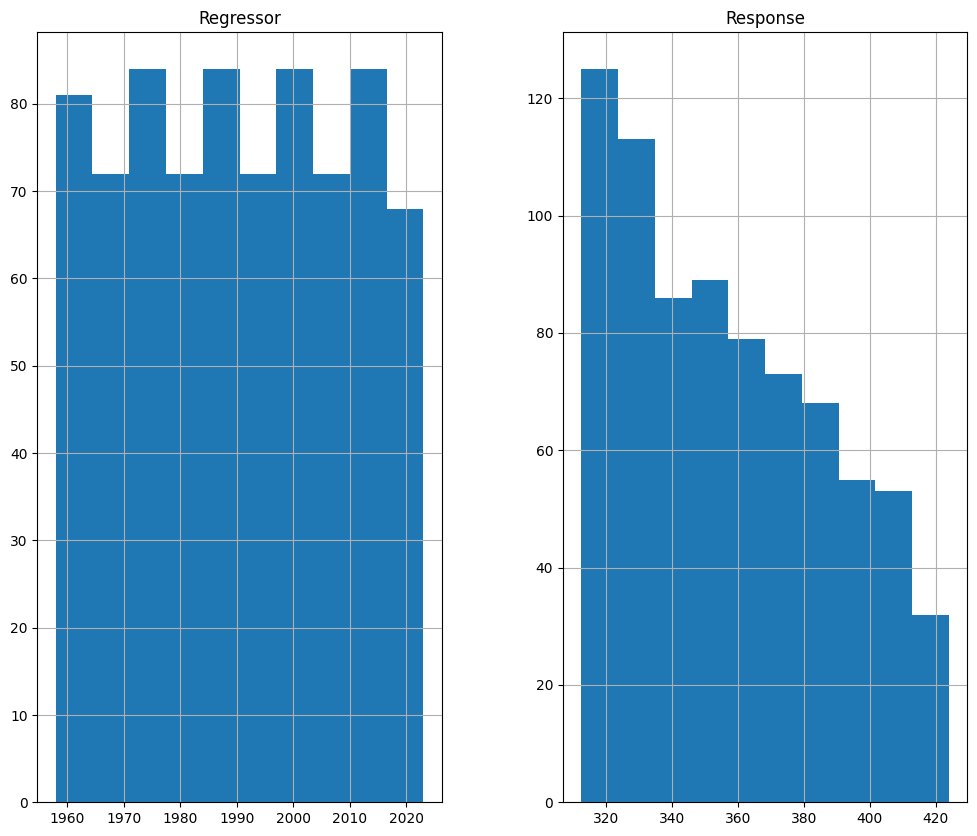

In [ ]:
#membuat histogram
df_CO2.hist(figsize=(12,10))

Text(0, 0.5, 'Response')

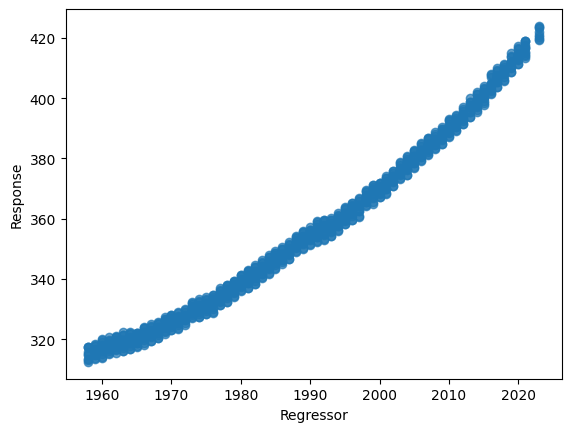

In [ ]:
#membuat scatter plot
plt.scatter(df_CO2['Regressor'], df_CO2['Response'], alpha=0.7)
plt.xlabel('Regressor')
plt.ylabel('Response')

**Interpretasi**


---
Dari output di atas, dapat dilihat bahwa hasil visualisasi menunjukkan terdapat hubungan yang positif antara variabel year dan CO2 levels dalam hal ini dinamai variabel Regressor dan Response. Semakin besar nilai variabel year, maka nilai variabel CO2 levels juga akan mengalami peningkatan.

#Model Building

In [ ]:
#spliting data menjadi data training dan testing dengan proporsi 80:20
#data training adalah data yang digunakan untuk pelatihan machine learning, sedangkan data testing adalah data yang digunakan untuk mengukur seberapa bagus performansi model yang digunakan
x_train, x_test, y_train, y_test = train_test_split(df_CO2[['Regressor']], df_CO2[['Response']], test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((618, 1), (155, 1), (618, 1), (155, 1))

In [ ]:
#initializing data
model = LinearRegression()

#fitting data
model.fit(x_train, y_train)

#prediksi
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

#r2
train_R2_LR = r2_score(y_train, pred_train)
test_R2_LR = r2_score(y_test, pred_test)

print('train R2 SCORE:', train_R2_LR)
print('test R2 SCORE:', test_R2_LR)

train R2 SCORE: 0.9777159308952309
test R2 SCORE: 0.9771082860821599


**Interpretasi**

---
Berdasarkan output  di atas dapat diketahui nilai koefisien determinasi masing-masing data, baik itu data training maupun testing. Pada data training nilai koefisien determinasi yang didapatkan sebesar 0,9777159308952309. Hal ini dapat diartikan bahwa sekitar 97,7% variasi variabel response dapat dijelaskan oleh variabel regressor, sedangkan sekitar 2,3% variasi variabel response dijelaskan oleh variabel lainnya. Selain itu, didapatkan juga nilai koefisien koefisien pada data testing yaitu sebesar 0,9771082860821599. Hal ini dapat diartikan juga bahwa sekitar 97,7% variasi variabel response dijelaskan oleh variabel regressor, sedangkan sekitar 2,3% variasi variabel response dijelaskan oleh variabel lainnya. Kedua data tersebut memiliki nilai koefisien determinasi yang hampir mendekati 1 ataupun 100%. Oleh karena itu, kedua data tersebut mampu menunjukkan kinerja model yang baik.

Text(0.5, 1.0, 'Regression analysis of Year vs CO2 Levels')

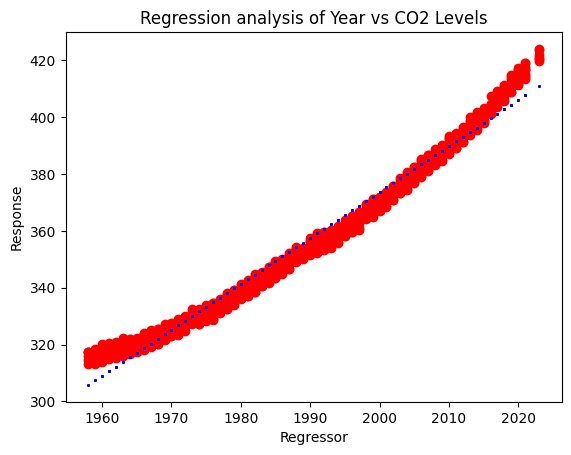

In [ ]:
#melihat model data training melalui scatter plot
plt.scatter(x_train, y_train, color = "red")
plt.scatter(x_train, pred_train, color = "blue", s = 0.5)
plt.xlabel("Regressor")
plt.ylabel("Response")
plt.title("Regression analysis of Year vs CO2 Levels")

**Interpretasi**


---
Dari output di atas, dapat dilihat bahwa hasil visualisasi pada data training menunjukkan terdapat hubungan yang positif antara variabel regressor dengan response. Dalam hal ini regressor berupa year, sedangkan response berupa CO2 levels. Dikatakan memiliki hubungan positif karena plot-plotnya berada diantara garis linier dan semakin besar nilai variabel year, maka nilai variabel CO2 levels juga akan semakin besar.

Text(0.5, 1.0, 'Regression analysis of Year vs CO2 Levels')

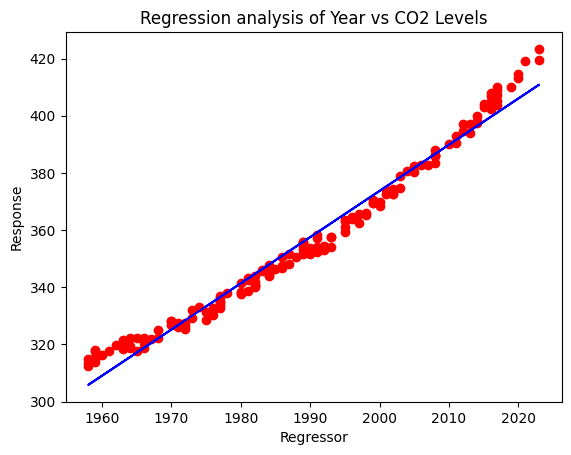

In [ ]:
#memvalidasi data testing berbentuk scatter plot
plt.scatter(x_test, y_test, color = "red") #data aktual
plt.plot(x_test, pred_test, color = "blue") #modelnya
plt.xlabel("Regressor")
plt.ylabel("Response")
plt.title("Regression analysis of Year vs CO2 Levels")

**Interpretasi**


---
Begitu juga data testing dimana visualisasi data yang dihasilkan menunjukkan terdapat hubungan yang positif antara variabel regressor dengan response, baik itu pada data aktual maupun prediksinya. Dalam hal ini regressor berupa year, sedangkan response berupa CO2 levels. Dikatakan memiliki hubungan positif karena plot-plotnya berada diantara garis linier dan semakin besar nilai variabel year, maka nilai variabel CO2 levels juga akan semakin besar.

In [ ]:
#mencari intercept model (b0)
intercept = model.intercept_
print("Intercept:", intercept)

Intercept: [-2858.35882931]


In [ ]:
#mencari slope (b1)
coef = model.coef_
print("Slope:", coef)

Slope: [[1.61601916]]


**Interpretasi**


---
Dari output di atas, didapatkan nilai intercept (b0) dan slope (b1) untuk membetuk persamaan modelnya. Diketahui nilai:
> b0 = -2858,35882931


> b1 = 1.61601916

Maka dari itu persamaan modelnya dapat dituliskan seperti persamaan berikut.

> y = b0 + b1 * x.

> y = -2858,35882931 + 1.61601916 * x.

Dengan keterangan :
> y = response = CO2 levels

> x = regressor = year

b0 = -2858,35882931 memiliki arti bahwa apabila nilai tahun sebesar 0, maka besar CO2 Levels sebesar -2858,35882931

b1 = 1.61601916 memiliki arti bahwa setiap peningkatan satu satuan variabel year
akan meningkatkan nilai CO2 Levels sebesar 1.61601916

In [ ]:
#MAE
mean_absolute_error(y_test, model.predict(x_test))

3.5882656446077306

**Interpretasi**

---
MAE merupakan metrik evaluasi yang digunakan untuk mengukur sejauh mana prediksi suatu model statistik berbeda dari nilai sebenarnya dalam suatu dataset. MAE mengukur kesalahan absolut rata-rata dari prediksi terhadap nilai sebenarnya. Semakin rendah nilai MAE menunjukkan bahwa model memiliki kinerja yang lebih baik dalam membuat prediksi yang akurat. Berdasarkan output di atas, nilai MAE sebesar 3,5882656446077306 dapat dikatakan cukup rendah. Hal ini dapat disimpulkan bahwa model yang ditentukan dapat menghasilkan prediksi yang mendekati nilai sebenanrnya.

In [ ]:
#MSE
mean_squared_error(y_test, model.predict(x_test))

19.943751554423965

**Interpretasi**

---
MSE merupakan metrik evaluasi yang digunakan untuk mengukur sejauh mana prediksi suatu model statistik berbeda dari nilai sebenarnya dalam suatu dataset. MSE mengukur kesalahan kuadrat rata-rata dari prediksi terhadap nilai sebenarnya. Semakin rendah nilai MSE menunjukkan bahwa model memiliki kinerja yang lebih baik dalam membuat prediksi yang akurat. Berdasarkan output di atas, nilai MSE sebesar 19,943751554423965 dapat dikatakan cukup rendah. Hal ini dapat disimpulkan bahwa model yang ditentukan dapat menghasilkan prediksi yang mendekati nilai sebenanrnya.

In [ ]:
#MAPE
mean_absolute_percentage_error(y_test, model.predict(x_test))

0.010108662296612676

**Interpretasi**

---
MAPE merupakan metrik evaluasi yang digunakan untuk mengukur sejauh mana prediksi suatu model statistik berbeda dari nilai sebenarnya dalam suatu dataset. MAPE mengukur kesalahan rata-rata dalam persentase dari prediksi terhadap nilai sebenarnya. Semakin rendah nilai MAPE menunjukkan bahwa model memiliki kinerja yang lebih baik dalam membuat prediksi yang akurat. Berdasarkan output di atas, nilai MAPE sebesar 0.010108662296612676 dapat dikatakan cukup rendah. Ketika MAPE sekitar 0.010108662296612676, ini mengartikan bahwa rata-rata kesalahan prediksi model adalah sekita 0,010 atau sekitar 1% dari nilai sebenarnya sehingga dapat disimpulkan bahwa model memiliki kinerja yang sangat baik dalam membuat prediksi yang mendekati nilai sebenarnya.

#**Part 5: Unsupervised Learning - K-Means Clustering**
If there are other climate-related variables in the dataset, use K-Means clustering to categorize years into different climate profiles.

#Import Library

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.colors import ListedColormap
from matplotlib import colors
import sklearn.cluster as cluster
import sklearn.metrics as metrics

#Import Data

In [ ]:
#mengimpor dataset methane
url = "https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt"
df_CH4 = pd.read_csv(url, delim_whitespace = True, skiprows = 47, header = None)
df_CH4.columns = ['year', 'mean', 'unc']
df_CH4

,year,mean,unc
0,1985,1657.29,0.67
1,1986,1670.09,0.82
2,1987,1682.70,0.48
3,1988,1693.16,0.66
4,1989,1704.53,0.54
5,1990,1714.43,0.69
6,1991,1724.82,0.72
7,1992,1735.47,0.60
8,1993,1736.50,0.44
9,1994,1742.07,0.63


In [ ]:
#memanggil dataset CO2 levels per tahun
mean_CO2_year

,year,CO2 levels
0,1958,315.180000
1,1959,315.980833
2,1960,316.910000
3,1961,317.644167
4,1962,318.454167
...,...,...
61,2019,411.649167
62,2020,414.210833
63,2021,416.413333
64,2022,418.528333


**Interpretasi**

---
Output di atas merupakan daftar dataset pada data methane. Dataset methane digunakan sebagai variabel independent tambahan dalam melakukan klasterisasi. Untuk data CO2 yang digunakan berupa data rata-rata tahunan. Hal ini dikarenakan untuk menyelaraskan pada data methane yang sudah disediakan. Dengan demikian, dalam proses klasterisasi akan terdapat 2 variabel independent berupa methane dan CO2 levels tahunan.

#Data Understanding

In [ ]:
#melihat informasi tipe data methane
df_CH4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    38 non-null     int64  
 1   mean    38 non-null     float64
 2   unc     38 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.0 KB


In [ ]:
#melihat informasi tipe data CO2 levels
mean_CO2_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        66 non-null     int64  
 1   CO2 levels  66 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.2 KB


**Interpretasi**

---
Dari hasil output di atas, dapat dilihat bahwa tipe dari kedua data, baik data methana maupun CO2 levels tahunan, adalah numerical yang berarti bahwa datanya berupa data kuantitatif yang nilainya berupa angka dimana tipe data yang digunakan pada masing-masing variabel/atribut berupa integer dan float.

In [ ]:
#melihat informasi statistika deskriptif CO2 levels
mean_CO2_year.describe()

,year,CO2 levels
count,66.000000,66.000000
mean,1990.500000,358.600928
std,19.196354,31.570063
min,1958.000000,315.180000
25%,1974.250000,330.425208
50%,1990.500000,355.078333
75%,2006.750000,383.541458
max,2023.000000,421.663750


In [ ]:
#melihat informasi statistika deskriptif methane
df_CH4.describe()

,year,mean,unc
count,38.000000,38.0000,38.000000
mean,2003.500000,1779.4550,0.585526
std,11.113055,60.6266,0.096917
min,1985.000000,1657.2900,0.360000
25%,1994.250000,1743.7700,0.530000
50%,2003.500000,1774.5550,0.590000
75%,2012.750000,1812.0875,0.630000
max,2022.000000,1911.8200,0.860000


**Interpretasi**

---
Dari output di atas kita dapat melihat jumlah data, nilai mean, nilai standar deviasi, nilai maksimal, nilai minimal, nilai quantile 1, quantile 2 dan quntile 3.

#Data Pre-Processing

In [ ]:
#melakukan dropping atribut 'unc' pada data methane
df_CH4.drop(['unc'], axis = 1, inplace = True)

In [ ]:
#melihat missing values pada data CO2
mean_CO2_year.isnull().sum()

year          0
CO2 levels    0
dtype: int64

In [ ]:
#melihat missing values pada data methane
df_CH4.isnull().sum()

year    0
mean    0
dtype: int64

**Interpretasi**

---

Setelah dilakukan pengecekan, terlihat bahwa dataset yang tersedia tidak terdeteksi adanya missing value pada setiap kolomnya.

In [ ]:
#melihat duplikasi pada data CO2
mean_CO2_year.duplicated().sum()

0

In [ ]:
#melihat duplikasi pada data methane
df_CH4.duplicated().sum()

0

**Interpretasi**

---

Setelah dilakukan pengecekan, terlihat bahwa dataset yang tersedia tidak terdeteksi adanya duplikasi.

In [ ]:
#mengambil sebagian dataset CO2 dari tahun 1985 - 2022
mean_CO2_year_lim = mean_CO2_year[(mean_CO2_year.year >= 1985) & (mean_CO2_year.year <= 2022)]
mean_CO2_year_lim

,year,CO2 levels
27,1985,346.351667
28,1986,347.608333
29,1987,349.311667
30,1988,351.690000
31,1989,353.205000
32,1990,354.452500
33,1991,355.704167
34,1992,356.545833
35,1993,357.215000
36,1994,358.959167


In [ ]:
#mengambil sebagian dataset methane dari tahun 1985
df_CH4_lim = df_CH4[(df_CH4.year >= 1985)]
df_CH4_lim

,year,mean
0,1985,1657.29
1,1986,1670.09
2,1987,1682.70
3,1988,1693.16
4,1989,1704.53
5,1990,1714.43
6,1991,1724.82
7,1992,1735.47
8,1993,1736.50
9,1994,1742.07


**Interpretasi**

---
Ouput di atas merupakan hasil filtering dari kedua data, baik data CO2 maupun methana. Dari data CO2 data yang diambil mulai dari tahun 1985 hingga 2022, begitu pun untuk data methana dimana data yang diambil mulai dari tahun 1985 hingga 2022. Mengapa demikian? Hal ini dikarenakan agar kedua data tersebut memiliki jumlah data yang seimbang, yaitu sebanyak 38.

In [ ]:
#membuat dataframe baru yang berisikan year, CO2 levels, dan mean methane
df = mean_CO2_year_lim.set_index('year').join(df_CH4_lim.set_index('year'),how='outer').reset_index()
df

,year,CO2 levels,mean
0,1985,346.351667,1657.29
1,1986,347.608333,1670.09
2,1987,349.311667,1682.70
3,1988,351.690000,1693.16
4,1989,353.205000,1704.53
5,1990,354.452500,1714.43
6,1991,355.704167,1724.82
7,1992,356.545833,1735.47
8,1993,357.215000,1736.50
9,1994,358.959167,1742.07


In [ ]:
#mengubah nama kolom
df = df.rename(columns = { "mean": "methane"})
df

,year,CO2 levels,methane
0,1985,346.351667,1657.29
1,1986,347.608333,1670.09
2,1987,349.311667,1682.70
3,1988,351.690000,1693.16
4,1989,353.205000,1704.53
5,1990,354.452500,1714.43
6,1991,355.704167,1724.82
7,1992,356.545833,1735.47
8,1993,357.215000,1736.50
9,1994,358.959167,1742.07


**Interpretasi**

---
Ouput di atas merupakan hasil dataframe final yang akan digunakan untuk eksplorasi data sekaligus pemodelan. Terdiri dari 3 kolom, antara lain kolom year, CO2 levels, dan methana.


#Exploratory Data Analysis

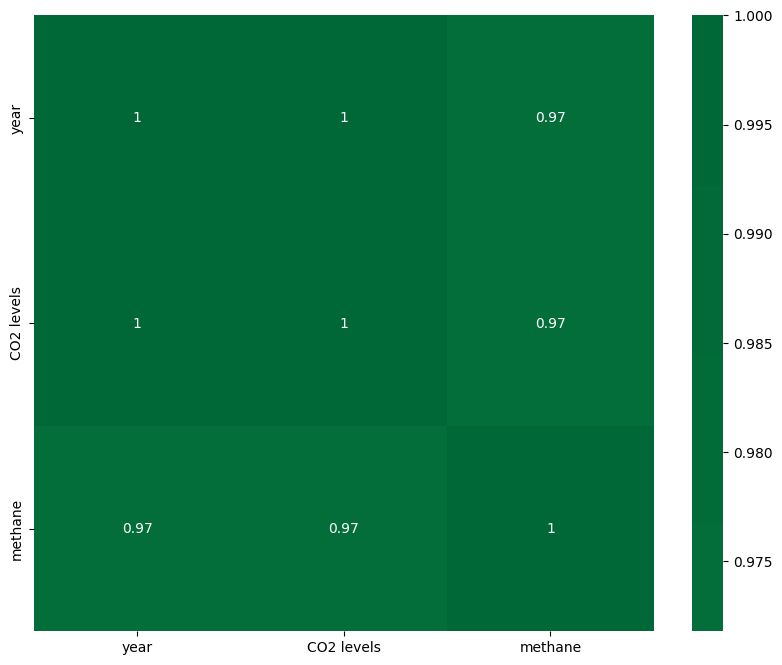

In [ ]:
#mengetahui korelasi antar atribut/variabel bebas melalui heatmap
plt.figure(figsize = (10,8))
p=sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', center=0)

**Interpretasi**


---
Berdasarkan output korelasi antar variabel di atas, dapat diketahui bahwa antar variabel memiliki hubungan yang kuat dan positif dengan nilai korelasinya sebesar 0,97 dan 1.

<Axes: xlabel='CO2 levels', ylabel='Count'>

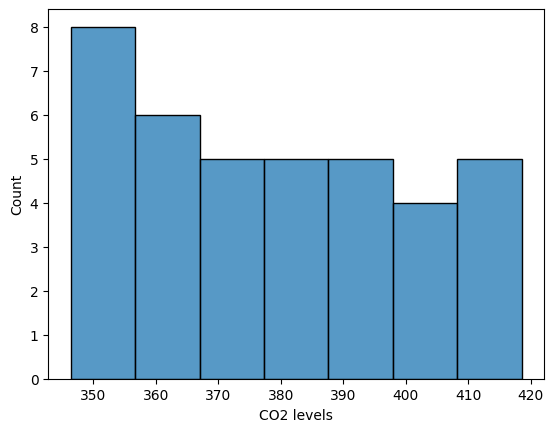

In [ ]:
sns.histplot(x = df['CO2 levels'])

<Axes: xlabel='methane', ylabel='Count'>

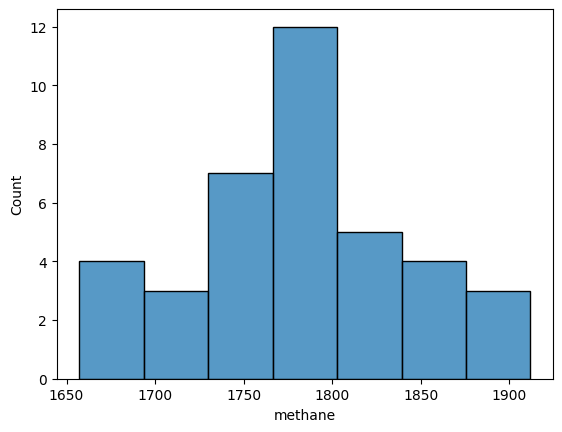

In [ ]:
sns.histplot(x = df['methane'])

**Interpretasi**

---
Berdasarkan output visualisasi secara univariat, tidak terlihat adanya outlier pada kedua data tersebut.

<Axes: xlabel='CO2 levels', ylabel='methane'>

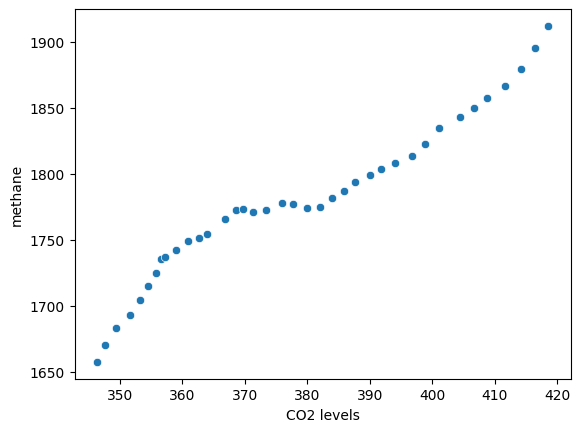

In [ ]:
sns.scatterplot(x = df['CO2 levels'], y = df['methane'])

**Interpretasi**


---
Berdasarkan output scatter plot di atas, dapat disimpulkan bahwa antara variabel CO2 levels dan methane memiliki hubungan yang kuat. Hal ini dikarenakan bentuk scatter plot kedua variabel tersebut tidak berpola.

#Model Bulding

In [ ]:
#melakukan scalling
scaler = StandardScaler()
scaler.fit(df[['CO2 levels','methane']])
scaled_ds = pd.DataFrame(scaler.fit_transform(df[['CO2 levels','methane']]), columns = (df[['CO2 levels','methane']]).columns)
print("All features are now scaled")

All features are now scaled


In [ ]:
print("Dataframe to be used for further modelling:")
scaled_ds

Dataframe to be used for further modelling:


,CO2 levels,methane
0,-1.510119,-2.042088
1,-1.451663,-1.828126
2,-1.372430,-1.617339
3,-1.261799,-1.442492
4,-1.191326,-1.252433
5,-1.133297,-1.086946
6,-1.075074,-0.913269
7,-1.035923,-0.735245
8,-1.004795,-0.718028
9,-0.923663,-0.624921


**Interpretasi**

---
Scalling merupakan proses normalisasi agar variabel memiliki satuan atau rentang yang sama

In [ ]:
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(scaled_ds)
labels1 = kmeans1.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
new_scaled_ds = pd.DataFrame(data = scaled_ds, columns = ['methane', 'CO2 levels'])
new_scaled_ds['label_kmeans1'] = labels1

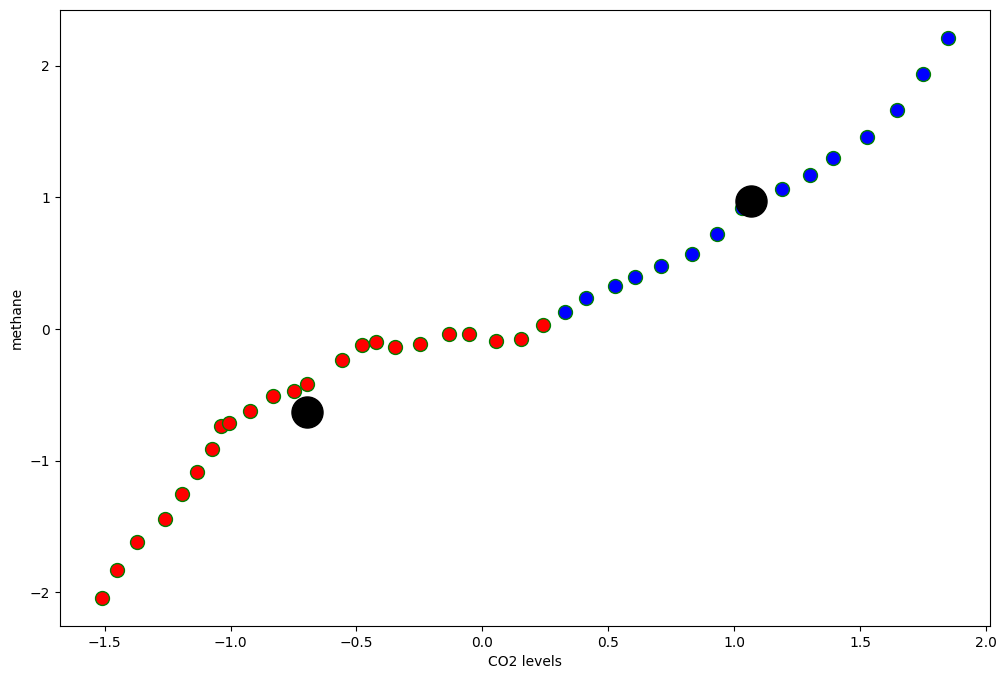

In [ ]:
# PLOTING untuk melihat clusternya masing-masing
fig, ax = plt.subplots(figsize = (12,8))
plt.scatter(new_scaled_ds['CO2 levels'][labels1 == 0],
            new_scaled_ds['methane'][labels1 == 0],
            c='blue',
            s=100,
            edgecolor='green',
            linestyle='-')
plt.scatter(new_scaled_ds['CO2 levels'][labels1 == 1],
            new_scaled_ds['methane'][labels1 == 1],
            c='red',
            s=100,
            edgecolor='green',
            linestyle='-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)
plt.xlabel('CO2 levels')
plt.ylabel('methane')
plt.show()

In [ ]:
#metode silhouette merupakan metode yang lebih tepat untuk menentukan jumlah cluster
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(new_scaled_ds).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(new_scaled_ds,labels,metric="euclidean",sample_size=1000,random_state=200)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Silhouette score for k(clusters) = 2 is 0.6140843489973312
Silhouette score for k(clusters) = 3 is 0.5409991995423902
Silhouette score for k(clusters) = 4 is 0.556011224087542
Silhouette score for k(clusters) = 5 is 0.5692677749171229
Silhouette score for k(clusters) = 6 is 0.5569190893934812
Silhouette score for k(clusters) = 7 is 0.499651608239654
Silhouette score for k(clusters) = 8 is 0.5112245972960806
Silhouette score for k(clusters) = 9 is 0.4767536011346518
Silhouette score for k(clusters) = 10 is 0.4975931686905843
Silhouette score for k(clusters) = 11 is 0.4387520371914761
Silhouette score for k(clusters) = 12 is 0.45546851463299814


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



**Interpretasi**

---
Karena nilai terbesar terjadi pada k = 2, yaitu sebesar 0,6140843489973312. Maka dapat disimpulkan bahwa data tersebut dapat dibagi ke dalam 2 cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



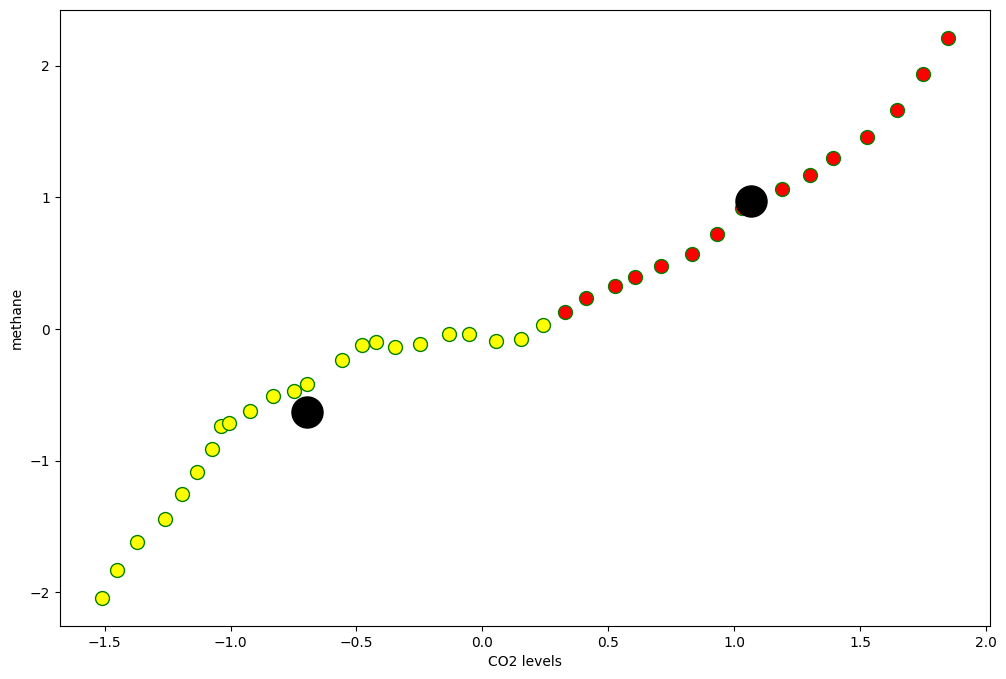

In [ ]:
#mencari clusternya berdasarkan nilai silhouette terbesar
kmeans2 = KMeans(n_clusters=2, init='k-means++', random_state=42).fit(scaled_ds)

labels2 = kmeans2.labels_
new_scaled_ds['label_kmeans2'] = labels2

fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(new_scaled_ds['CO2 levels'][new_scaled_ds.label_kmeans2 == 0],
            new_scaled_ds['methane'][new_scaled_ds.label_kmeans2 == 0],
            c='red',
            s=100,
            edgecolor='green',
            linestyle='-')
plt.scatter(new_scaled_ds['CO2 levels'][new_scaled_ds.label_kmeans2 == 1],
            new_scaled_ds['methane'][new_scaled_ds.label_kmeans2 == 1],
            c='yellow',
            s=100,
            edgecolor='green',
            linestyle='-')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)
plt.xlabel('CO2 levels')
plt.ylabel('methane')
plt.show()

**Interpretasi**

---
Berdasarkan output di atas dengan menggunakan metode silhouette didapatkan jumlah cluster optimumnya sebanyak 2 cluster. Hal ini dikarenakan pada jumlah cluster tersebut memiliki nilai silhouette paling tinggi dibandingkan dengan nilai silhouette pada jumlah cluster lainnya.

In [ ]:
#melihat label dari masing-masing tahun
kmeans2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
#membuat dataframe label
labels = pd.DataFrame(kmeans2.labels_)
labels.head()

,0
0,1
1,1
2,1
3,1
4,1


In [ ]:
#mengganti nama kolom labels
label = labels.rename(columns = {0: "labels"})
label.head()

,labels
0,1
1,1
2,1
3,1
4,1


In [ ]:
#menambah kolom kmeans2.labels_ pada dataframe data
df = pd.concat([df, label], axis = 1)
df

,year,CO2 levels,methane,labels
0,1985,346.351667,1657.29,1
1,1986,347.608333,1670.09,1
2,1987,349.311667,1682.70,1
3,1988,351.690000,1693.16,1
4,1989,353.205000,1704.53,1
5,1990,354.452500,1714.43,1
6,1991,355.704167,1724.82,1
7,1992,356.545833,1735.47,1
8,1993,357.215000,1736.50,1
9,1994,358.959167,1742.07,1


In [ ]:
#melihat jumlah anggota pada setiap cluster
jml_anggota_per_cluster = df['labels'].value_counts()
jml_anggota_per_cluster

1    23
0    15
Name: labels, dtype: int64

**Interpretasi**

---
Berdasarkan output di atas, dapat disimpulkan bahwa terdapat 15 objek pada cluster 0 dan 23 objek pada cluster pada cluster 1.

In [ ]:
#melihat anggota pada kelompok 0
df2=df.copy()
df2['kluster'] = kmeans2.labels_
df2[df2['kluster']==0].sort_values(by=['CO2 levels','methane'])

,year,CO2 levels,methane,labels,kluster
23,2008,385.831667,1787.01,0,0
24,2009,387.642500,1793.53,0,0
25,2010,390.101667,1798.93,0,0
26,2011,391.850833,1803.14,0,0
27,2012,394.055833,1808.12,0,0
28,2013,396.737500,1813.41,0,0
29,2014,398.812500,1822.57,0,0
30,2015,401.011667,1834.26,0,0
31,2016,404.412500,1843.12,0,0
32,2017,406.758333,1849.58,0,0


In [ ]:
#melihat anggota pada kelompok 1
df2=df.copy()
df2['kluster'] = kmeans2.labels_
df2[df2['kluster']==1].sort_values(by=['CO2 levels','methane'])

,year,CO2 levels,methane,labels,kluster
0,1985,346.351667,1657.29,1,1
1,1986,347.608333,1670.09,1,1
2,1987,349.311667,1682.70,1,1
3,1988,351.690000,1693.16,1,1
4,1989,353.205000,1704.53,1,1
5,1990,354.452500,1714.43,1,1
6,1991,355.704167,1724.82,1,1
7,1992,356.545833,1735.47,1,1
8,1993,357.215000,1736.50,1,1
9,1994,358.959167,1742.07,1,1


**Interpretasi**

---
Sesuai dengan tujuan awal bahwa akan dilakukan pengelompokkan tahun berdasarkan rata-rata CO2 level dan methane mulai dari 1985 sampai 2022. Berdasarkan output di atas telah didapatkan beberapa anggota pada cluster 0 dan cluster 1. Anggota pada cluster 0 terdiri dari tahun 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, dan 2022. Sedangkan anggota pada cluster 1 terdiri dari tahun 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, dan 2007.